# High School Statistics

In [31]:
# import libraries
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import functions
from hs_stats import *

***
## Descriptive Statistics

In [3]:
data = [12, 15, 12, 18, 20, 20, 20, 25, 30, 30, 30, 35, 40]

### Mean, Median, Mode

In [4]:
m1 = mean(data)
m2 = median(data)
m3 = mode(data)

npdata = np.array(data)
n1 = np.mean(npdata)
n2 = np.median(npdata)
n3 = stats.mode(npdata).mode

print("my code")
print(f'mean : {round(m1,3)} | median : {m2} | mode : {m3}')
print("\ncheck")
print(f'mean : {round(n1,3)} | median : {n2} | mode : {n3}')

my code
mean : 23.615 | median : 20 | mode : {20, 30}

check
mean : 23.615 | median : 20.0 | mode : 20


### Variance

__variance__ : spread between numbers of a data set 
- __distance between each number + the average__ and thus from every number in the set
- application : determines volatility, market stability

#### `population` variance

$\sigma^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{N} $

term | def / significance |
:-: | :- |
$x_i$ | each value in data set | 
$\bar{x}$ | mean of data set |
$N$ | data set size
$x_i - \bar{x}$ | distance between each point + mean
$(x_i - \bar{x})^2$ | renders all differences positive (no cancellation), emphasizes larger deviation

In [5]:
v1 = p_variance(data)
v2 = np.var(data)

print(f'my code : {v1}')
print(f'check : {v2}')

my code : 72.0828402366864
check : 72.0828402366864


#### `sample` variance
$s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1} $

$n-1$ : bias correction
- sample mean already optimized to be close to sample points
- without correction, sample variance < population variance, systematically

In [6]:
v1 = s_variance(data)
v2 = np.var(data, ddof=1)

print(f'my code : {v1}')
print(f'check : {v2}')

my code : 78.08974358974359
check : 78.08974358974359


### Standard Deviation

__standard deviation__ : dispersion of individual points from mean
- applications : determines relative riskiness of assets

$\sigma$ `population` standard deviation

$s$ `sample` standard deviation

$\sqrt{variance}$

In [7]:
s1 = standard_deviation(data,False)
s2 = standard_deviation(data,True)
s3 = np.std(data)

print(f'my code\n - {s1} (population variance)\n - {s2} (sample variance)')
print(f'check: {s3}')

my code
 - 8.490161378718687 (population variance)
 - 8.836840136029597 (sample variance)
check: 8.490161378718687


When calculating the standard deviation, use the population variance if working with `complete` population data. Otherwise, the sample variance corrects bias and should be used.

### Z-Score

__z-score__ : distance between a data point and the mean
- compare data points in relation to each other + overall variation/spread of data

$z=(\frac{x-\mu}{\sigma})$

Standard Deviation and Z-Scores
| Standard Deviation | Z-Score Relation |
| :-: | :-: |
| small | moderate z-score --> possible outlier |
| large | need large z-score to be outlier |

Value of Z-Scores
| value | significance |
| :-: | :-: |
| 0 | = mean |
| 1 | 1 standard deviation from the mean |
| > 0 | above mean |
| < 0 | below mean |

In [16]:
print(f'mean : {mean(data)}, standard deviation : {standard_deviation(data)}\n') 
seen = set()
for x in data :
    if x not in seen : 
        print(f'{x} : {round(z_score(data,x),3)}')
        seen.add(x)

mean : 23.615384615384617, standard deviation : 8.836840136029597

12 : -1.314
15 : -0.975
18 : -0.635
20 : -0.409
25 : 0.157
30 : 0.722
35 : 1.288
40 : 1.854


***
## Distributions

### Introduction to the Normal Distribution

#### Empirical rule 

![empirical rule image](assets/empiricalrule.png)

68-95-99.7 rule 
| % data points | distance from mean (standard deviations) |
| :-: | :-: |
| 68% | 1 |
| 95% | 2 |
| 99.7 | 3 |

#### Z-Table / Standard Normal Table 

percentile : the proportion or percentage of data points below the data point of interest

A Z-Table gives the percentiles associated with z-scores of a dataset. Search the z-score using the X- and Y- axis and the value in the cross-section is the percentile. This is written mathematically as follows :

$P(Z < zscore(x)) = proportion$

To get the proportion of data points above the data point of interest, subtract the proportion below the data point from 1.
 
$1 - P(Z < zscore(x)) = proportion $

### Conditional and Marginal Distribution

A two-way table shows the probability of an event given 2 conditions (dimensions). 

The marginal distribution gives the probability of a single condition. In other words, the total of a row or column divided by the overall total. 
- can be given in counts or percentages

The conditional distribution is the distribution of one variable given the other (the condition). 
- always given in percentages

***
## Probability Basics

### Basic Rules

#### Addition Rule


$P(A \cup B) = \frac{|A| + |B| - (|A+B|)}{total}$

$P(A$ or $B) = P(A) + P(B) - P(A$ and $B)$

#### Multiplication Rule : Compound probability of independent events

$P(AABC...) = P(A_1) \times P(A_2) \times P(B) \times P(C) \times ...$

### Conditional Probability

$P(X) = \frac{X}{\Omega'}$, where $\Omega'$ is the "universe" in which the conditions applies. 
Otherwise, written as $P(X|condition)$

For example, when picking out things without replacement ("sans remise"), the total ($\Omega$) by which you divide each time would decrease by 1 (-> $\Omega'$). 

### Independence

If $P(A) == P(A|B)$ and $P(B) == P(B|A)$, then $A$ and $B$ are independent.

Or more formally, $P(A \cap B) == P(A) \times P(B)$

### Bayes' Theorem

$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$, $P(B) \neq 0$

***
## Data Visualisation

In [40]:
data_vis = [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 8]

### Histogram

Counter({5: 3, 2: 2, 1: 1, 3: 1, 4: 1, 6: 1, 7: 1, 8: 1})


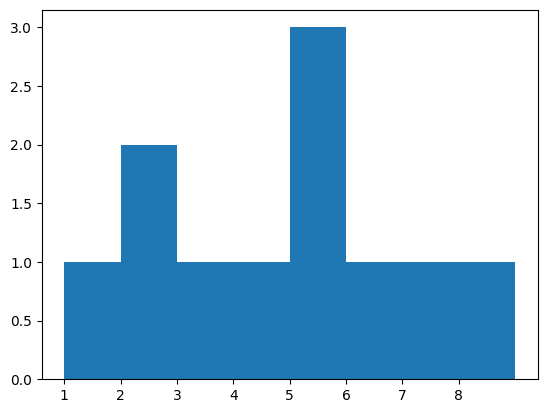

In [41]:
print(Counter(data_vis))
plt.hist(data_vis, bins=range(min(data_vis),max(data_vis)+2))
plt.xticks(np.arange(min(data_vis),max(data_vis)+ 1,1))
plt.show()

### Box Plot

### Scatter Plot

***
# Sources

Khan Academy, ChatGPT

investopedia
- https://www.investopedia.com/terms/v/variance.asp
- https://www.investopedia.com/terms/s/standarddeviation.asp